<a href="https://colab.research.google.com/github/aamitmakhija/TrafficSignDetection/blob/main/ANN_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data discovery

In [ ]:
from google.colab import files
import pandas as pd
import io

# Upload file
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
df = pd.read_excel(io.BytesIO(uploaded[file_name]))

# Display the first few rows of the DataFrame
df.head()


Saving Concrete_Data.xls to Concrete_Data.xls


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


Check for Missing values

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64


  Summary Statistics

In [ ]:
# Get summary statistics for each column
summary_stats = df.describe()
print("Summary statistics:\n", summary_stats)


Summary statistics:
        Cement (component 1)(kg in a m^3 mixture)  \
count                                1030.000000   
mean                                  281.165631   
std                                   104.507142   
min                                   102.000000   
25%                                   192.375000   
50%                                   272.900000   
75%                                   350.000000   
max                                   540.000000   

       Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
count                                        1030.000000       
mean                                           73.895485       
std                                            86.279104       
min                                             0.000000       
25%                                             0.000000       
50%                                            22.000000       
75%                                           142.950000      

Outliers Detection

In [ ]:
# Print the column names
print(df.columns)


Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

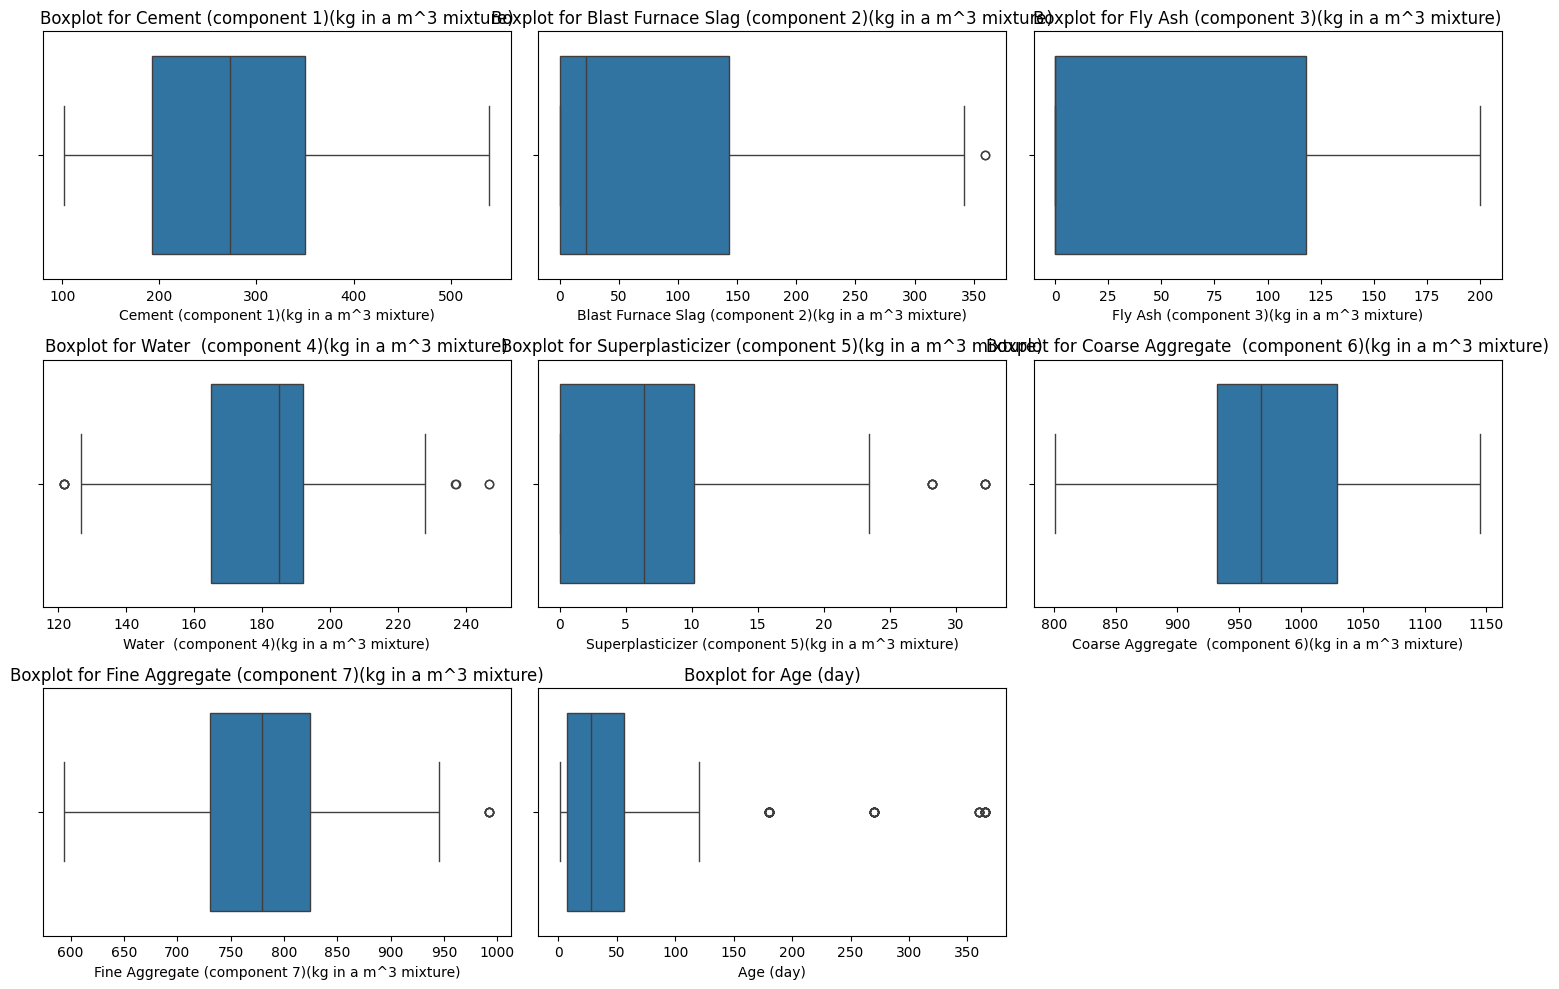

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use the exact column names from your dataset
features = [
    'Cement (component 1)(kg in a m^3 mixture)',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
    'Fly Ash (component 3)(kg in a m^3 mixture)',
    'Water  (component 4)(kg in a m^3 mixture)',
    'Superplasticizer (component 5)(kg in a m^3 mixture)',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)',
    'Age (day)'
]

# Plot boxplots for each feature
plt.figure(figsize=(15, 10))
for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)  # Create a subplot for each feature
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
plt.tight_layout()
plt.show()


Correlation Matrix and Heatmap

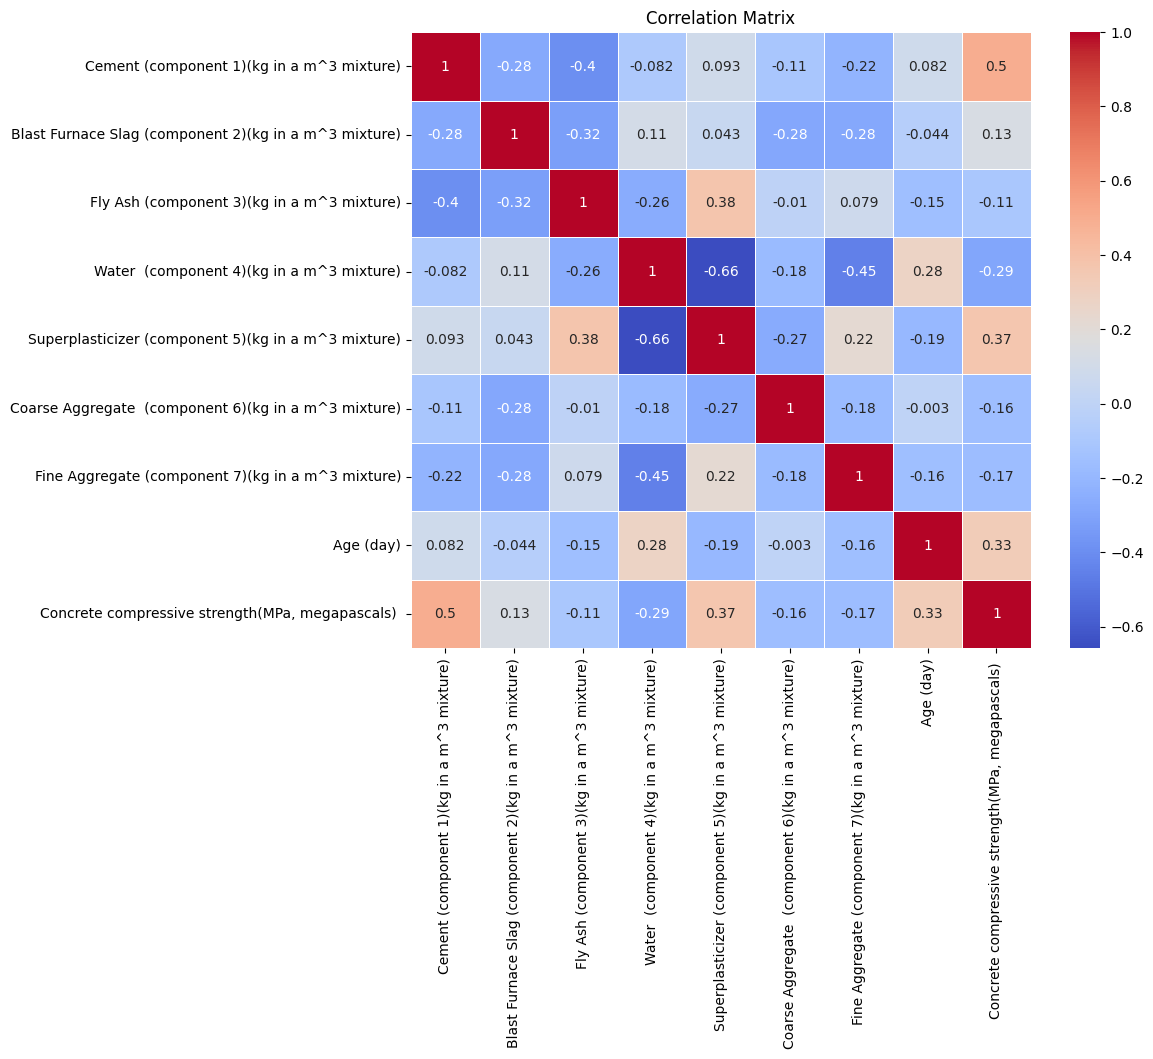

In [ ]:
# Correlation matrix
correlation_matrix = df.corr()

# Heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Scatter Plot for Features vs Target

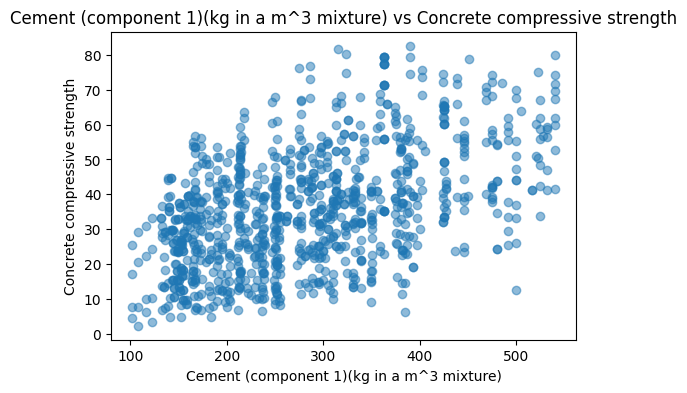

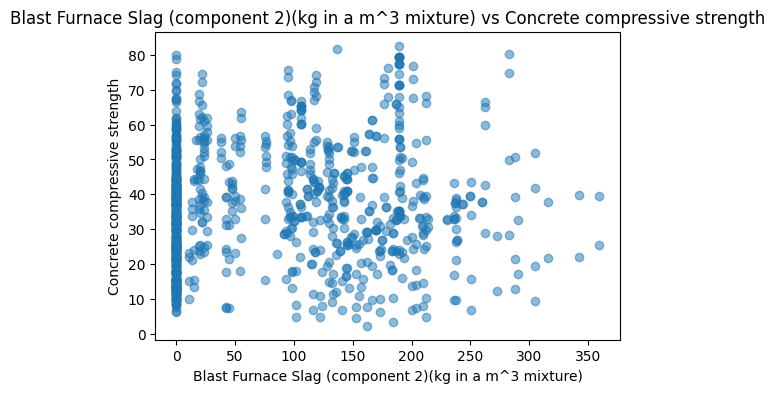

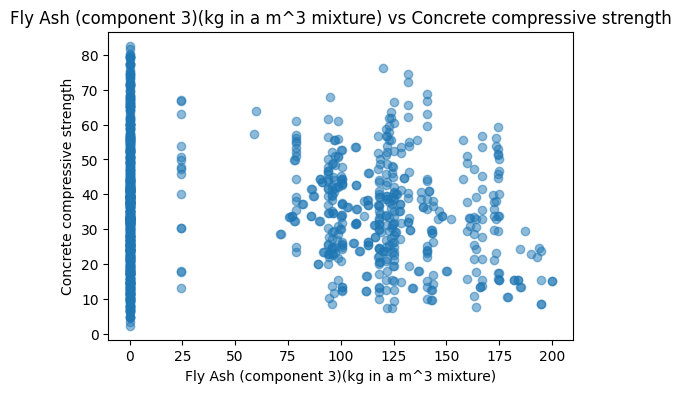

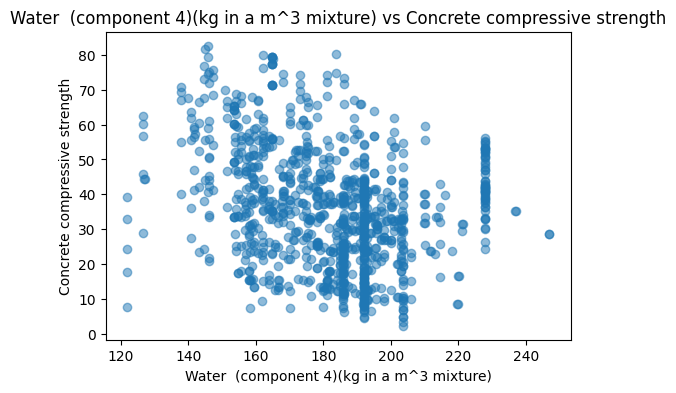

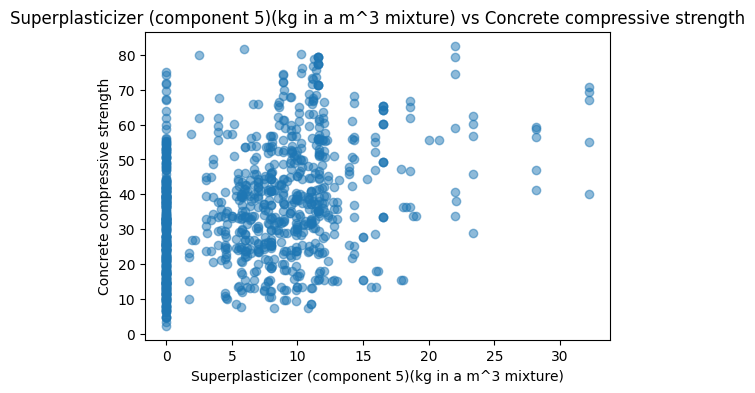

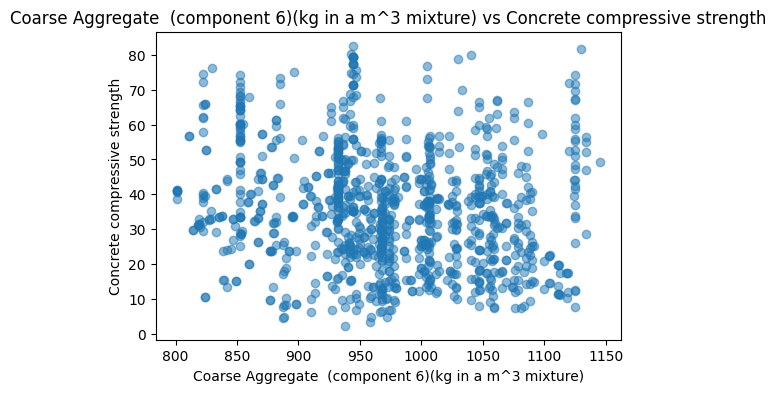

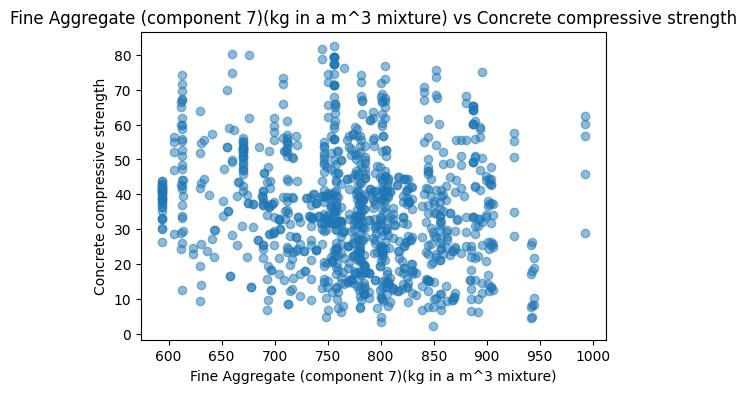

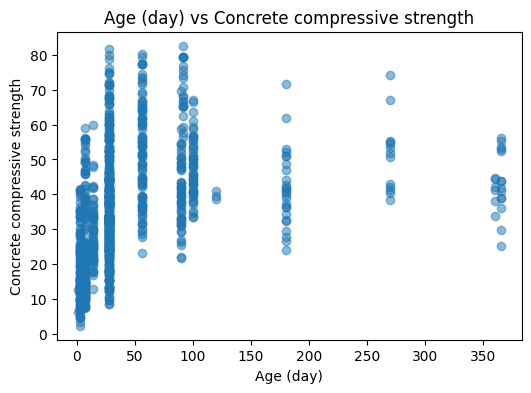

In [ ]:
# Target column
target = 'Concrete compressive strength(MPa, megapascals) '

# Scatter plots for each feature vs. Concrete Compressive Strength
for col in features:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[col], df[target], alpha=0.5)
    plt.title(f'{col} vs Concrete compressive strength')
    plt.xlabel(col)
    plt.ylabel('Concrete compressive strength')
    plt.show()


Scaling/Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize the scaler (choose MinMaxScaler or StandardScaler)
scaler = MinMaxScaler()  # You can change this to StandardScaler() if needed

# Apply scaling to the feature columns
scaled_features = scaler.fit_transform(df[features])

# Convert the scaled features back into a DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=features)

# Add the target column (unscaled) back to the scaled DataFrame
df_scaled[target] = df[target]

# Display the scaled data
df_scaled.head()


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,1.000000,0.000000,0.0,0.321357,0.07764,0.694767,0.205720,0.074176,79.986111
1,1.000000,0.000000,0.0,0.321357,0.07764,0.738372,0.205720,0.074176,61.887366
2,0.526256,0.396494,0.0,0.848303,0.00000,0.380814,0.000000,0.739011,40.269535
3,0.526256,0.396494,0.0,0.848303,0.00000,0.380814,0.000000,1.000000,41.052780
4,0.220548,0.368392,0.0,0.560878,0.00000,0.515698,0.580783,0.986264,44.296075


Check for Duplicates

In [ ]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicates}')

# If there are duplicates and you want to remove them
df = df.drop_duplicates()


Number of duplicate rows: 25


Outliers Handling

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the features
Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)
IQR = Q3 - Q1  # Interquartile Range

# Filter out outliers: Keep rows where no features have outliers
df_outliers_removed = df[~((df[features] < (Q1 - 1.5 * IQR)) | (df[features] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Check the shape of the new dataset after removing outliers
print("Shape after removing outliers:", df_outliers_removed.shape)


Shape after removing outliers: (919, 9)


Removing duplicates

In [ ]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicates}')

# If there are duplicates, remove them
df = df.drop_duplicates()

# Check the shape of the dataset after removing duplicates
print("Shape of the dataset after removing duplicates:", df.shape)


Number of duplicate rows: 0
Shape of the dataset after removing duplicates: (1005, 9)


# Feature engineering

Polynomial Features Testing


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Initialize PolynomialFeatures (degree 2 for quadratic features)
poly = PolynomialFeatures(degree=2, include_bias=False)

# Apply to the selected features
X_poly = poly.fit_transform(df[features])

# Create a new DataFrame for polynomial features
poly_features = poly.get_feature_names_out(features)
df_poly = pd.DataFrame(X_poly, columns=poly_features)

# Add the target variable back to the DataFrame
df_poly[target] = df[target]

# Check the new feature set
df_poly.head()

# Test the shape and see how the number of features increased
print(f'Original shape: {df[features].shape}')
print(f'Shape after polynomial features: {df_poly.shape}')


Original shape: (1005, 8)
Shape after polynomial features: (1005, 45)


In [ ]:
# Create interaction features manually between selected features
df['Cement_Water'] = df['Cement (component 1)(kg in a m^3 mixture)'] * df['Water  (component 4)(kg in a m^3 mixture)']
df['Slag_Age'] = df['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'] * df['Age (day)']

# Check the DataFrame after adding interaction terms
df[['Cement_Water', 'Slag_Age']].head()

# Test the shape to verify new columns are added
print(f"Shape after adding interaction features: {df.shape}")


Shape after adding interaction features: (1005, 11)


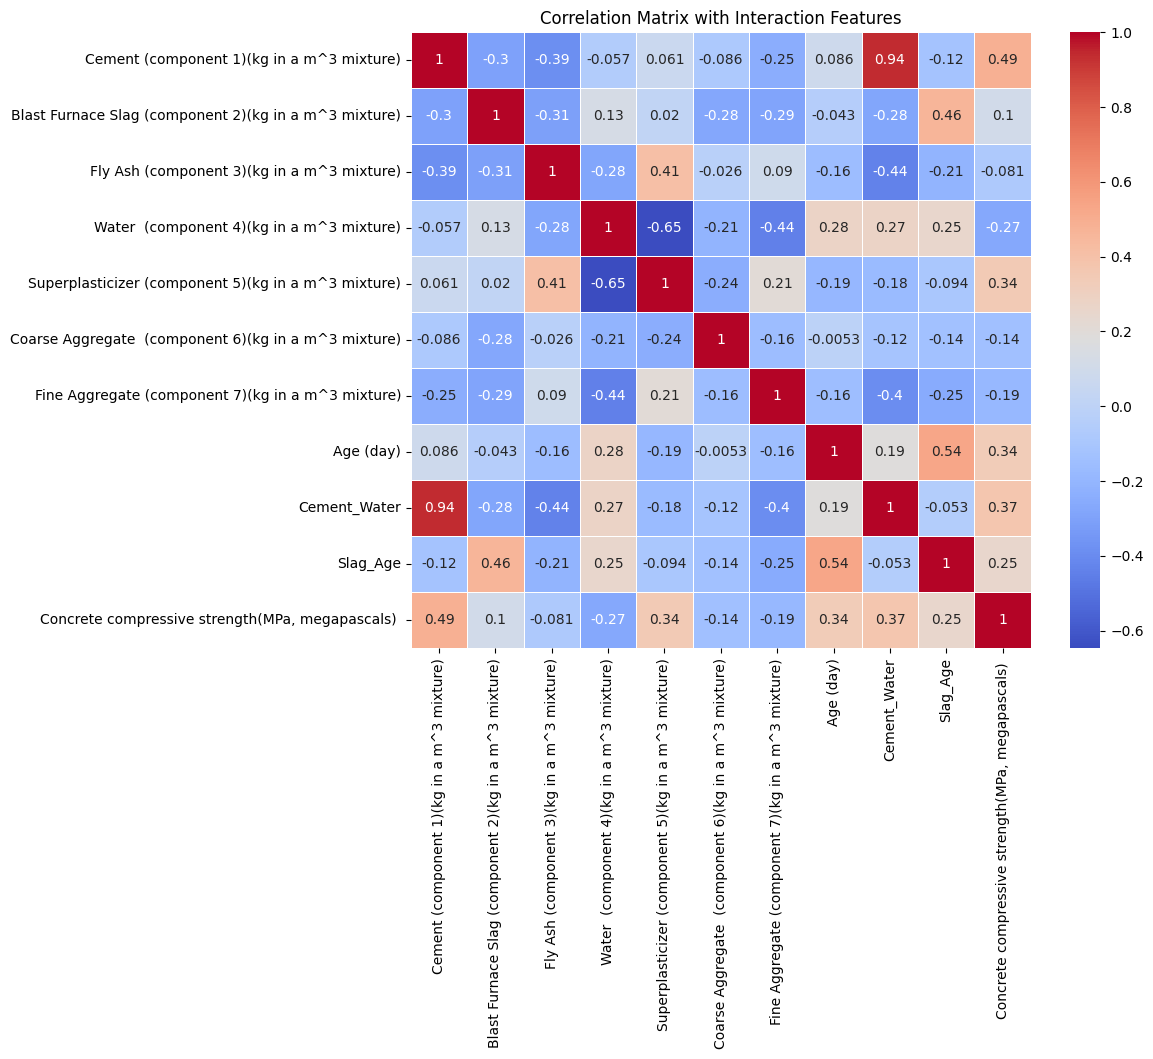

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Add interaction features to a list for correlation testing
features_interaction = [
    'Cement (component 1)(kg in a m^3 mixture)',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
    'Fly Ash (component 3)(kg in a m^3 mixture)',
    'Water  (component 4)(kg in a m^3 mixture)',
    'Superplasticizer (component 5)(kg in a m^3 mixture)',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)',
    'Age (day)',
    'Cement_Water',  # Newly added interaction feature
    'Slag_Age'       # Newly added interaction feature
]

# Add target column
target = 'Concrete compressive strength(MPa, megapascals) '

# Calculate the correlation matrix
correlation_matrix = df[features_interaction + [target]].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix with Interaction Features')
plt.show()


In [ ]:
import numpy as np

# Apply log transformation to skewed features
df['Log_Cement'] = np.log1p(df['Cement (component 1)(kg in a m^3 mixture)'])
df['Log_Water'] = np.log1p(df['Water  (component 4)(kg in a m^3 mixture)'])

# Verify that the columns have been created
print(df[['Log_Cement', 'Log_Water']].head())


   Log_Cement  Log_Water
0    6.293419   5.093750
1    6.293419   5.093750
2    5.809643   5.433722
3    5.809643   5.433722
4    5.296315   5.262690


                                                  Cement_Water  Slag_Age  \
Cement_Water                                          1.000000 -0.053082   
Slag_Age                                             -0.053082  1.000000   
Log_Cement                                            0.923306 -0.125155   
Log_Water                                             0.259525  0.230285   
Concrete compressive strength(MPa, megapascals)       0.372378  0.253456   

                                                  Log_Cement  Log_Water  \
Cement_Water                                        0.923306   0.259525   
Slag_Age                                           -0.125155   0.230285   
Log_Cement                                          1.000000  -0.069058   
Log_Water                                          -0.069058   1.000000   
Concrete compressive strength(MPa, megapascals)     0.480059  -0.287115   

                                                  Concrete compressive strength(MPa, megapas

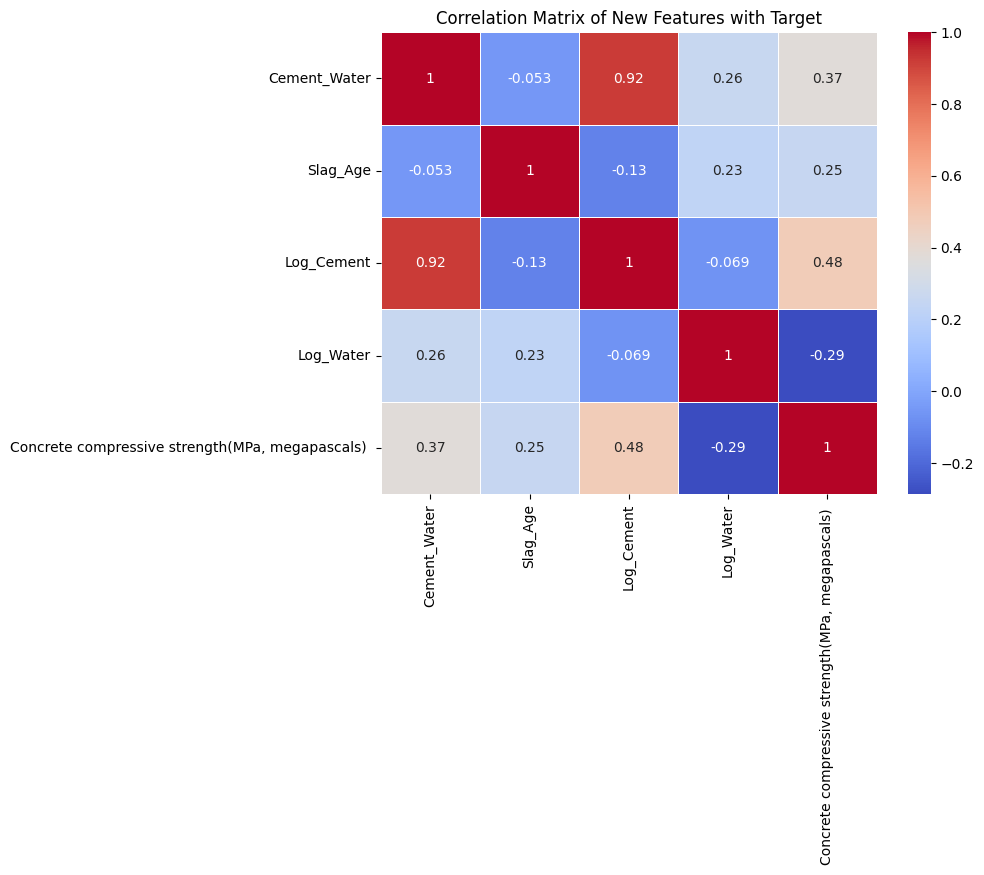

In [ ]:
# Define the new features
new_features = ['Cement_Water', 'Slag_Age', 'Log_Cement', 'Log_Water']

# Target column
target = 'Concrete compressive strength(MPa, megapascals) '

# Calculate the correlation matrix for the new features and target
correlation_matrix_new = df[new_features + [target]].corr()

# Display the correlation matrix
print(correlation_matrix_new)

# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_new, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of New Features with Target')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Assume df is your DataFrame, features are your input features, and target is your output
X = df[features]  # Your features (e.g., Cement, Water, etc.)
y = df[target]    # Your target (e.g., Concrete compressive strength)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")


Training data shape: (804, 8), (804,)
Testing data shape: (201, 8), (201,)


Creating config file

# Updated features list based on the actual DataFrame columns
features = [
    'Cement (component 1)(kg in a m^3 mixture)',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
    'Fly Ash (component 3)(kg in a m^3 mixture)',
    'Water  (component 4)(kg in a m^3 mixture)',
    'Superplasticizer (component 5)(kg in a m^3 mixture)',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)',
    'Age (day)',

    
    'Cement_Water',  # New feature
    'Slag_Age',      # New feature
    'Log_Cement',    # New feature
    'Log_Water'      # New feature
]

# Target column
target = 'Concrete compressive strength(MPa, megapascals) '


# Config file

In [ ]:
import json
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Configuration dictionary
config = {
    "model": {
        "layers": [
            {"type": "Dense", "units": 128, "activation": "tanh", "input_dim": 8},  # First layer
            {"type": "BatchNormalization"},  # Batch normalization after Dense
            {"type": "Dropout", "rate": 0.3},  # Dropout layer for regularization

            {"type": "Dense", "units": 64, "activation": "relu"},  # Second layer
            {"type": "BatchNormalization"},  # Batch normalization after Dense
            {"type": "Dropout", "rate": 0.3},  # Dropout layer for regularization

            {"type": "Dense", "units": 32, "activation": "elu"},  # Third layer
            {"type": "BatchNormalization"},  # Batch normalization after Dense
            {"type": "Dropout", "rate": 0.3},  # Dropout layer for regularization

            {"type": "Dense", "units": 16, "activation": "relu"},  # Fourth layer
            {"type": "BatchNormalization"},  # Batch normalization after Dense

            {"type": "Dense", "units": 1, "activation": "linear"}  # Output layer
        ]
    },

    "optimizer": {
        "type": "adam",  # Adam optimizer (can be changed to SGD if needed)
        "learning_rate": 0.001  # Initial learning rate
    },
    "loss_function": "mean_squared_error",
    "metrics": ["mean_absolute_error"],
    "epochs": 200,  # Increased epochs for longer training
    "batch_size": 32,
    "early_stopping": {
        "monitor": "val_loss",
        "patience": 10,  # Early stop after 10 epochs of no improvement
        "restore_best_weights": True
    },
    "reduce_lr_on_plateau": {
        "monitor": "val_loss",
        "factor": 0.1,  # Reduce learning rate by 10%
        "patience": 5,  # If no improvement for 5 epochs, reduce learning rate
        "min_lr": 1e-6
    }
}

# Save config to file
config_path = "/content/config.json"
with open(config_path, "w") as config_file:
    json.dump(config, config_file)



In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input
import json

# Load the config file
def load_config(config_path):
    with open(config_path, 'r') as config_file:
        config = json.load(config_file)
    return config

# Build the model dynamically based on the config file
def build_model(config):
    model = Sequential()

    # Hardcode the input shape for testing (change input_dim to 12)
    model.add(Input(shape=(12,)))  # Hardcoded 12 input features

    # Add the layers dynamically based on the config
    for layer in config['model']['layers']:
        if layer['type'] == 'Dense':
            model.add(Dense(units=layer['units'], activation=layer['activation']))
        elif layer['type'] == 'BatchNormalization':
            model.add(BatchNormalization())
        elif layer['type'] == 'Dropout':
            model.add(Dropout(rate=layer['rate']))

    # Compile the model
    optimizer = Adam(learning_rate=config['optimizer']['learning_rate'])  # Using Adam with config learning rate
    model.compile(optimizer=optimizer, loss=config['loss_function'], metrics=config['metrics'])

    return model

# Train the model
def train_model(model, X_train, y_train, X_test, y_test, config):
    history = model.fit(
        X_train, y_train,
        epochs=config['epochs'],
        batch_size=config['batch_size'],
        validation_data=(X_test, y_test)
    )
    return history

# Main script
if __name__ == "__main__":
    # Path to the config file
    config_path = "/content/config.json"  # Adjust this to your actual path

    # Load configuration
    config = load_config(config_path)

    # Assuming df is your DataFrame with your data
    features = [
        'Cement (component 1)(kg in a m^3 mixture)',
        'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
        'Fly Ash (component 3)(kg in a m^3 mixture)',
        'Water  (component 4)(kg in a m^3 mixture)',
        'Superplasticizer (component 5)(kg in a m^3 mixture)',
        'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
        'Fine Aggregate (component 7)(kg in a m^3 mixture)',
        'Age (day)',
        'Cement_Water',
        'Slag_Age',
        'Log_Cement',
        'Log_Water'
    ]
    target = 'Concrete compressive strength(MPa, megapascals) '

    # Split the dataset into training and testing sets
    X = df[features]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Check shapes
    print(f"Training data shape: {X_train.shape}, {y_train.shape}")
    print(f"Testing data shape: {X_test.shape}, {y_test.shape}")

    # Build the model dynamically based on the loaded config
    model = build_model(config)

    # Train the model
    history = train_model(model, X_train, y_train, X_test, y_test, config)

    # Evaluate the model on test data
    evaluation = model.evaluate(X_test, y_test)
    print(f"Test Loss: {evaluation[0]}, Test Mean Absolute Error: {evaluation[1]}")


Training data shape: (804, 12), (804,)
Testing data shape: (201, 12), (201,)
Epoch 1/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 1449.9822 - mean_absolute_error: 34.6211 - val_loss: 1495.0785 - val_mean_absolute_error: 34.5963
Epoch 2/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1453.7023 - mean_absolute_error: 34.6325 - val_loss: 1476.5181 - val_mean_absolute_error: 34.3457
Epoch 3/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1351.9849 - mean_absolute_error: 33.5846 - val_loss: 1477.4061 - val_mean_absolute_error: 34.3735
Epoch 4/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1420.5974 - mean_absolute_error: 34.3116 - val_loss: 1464.5217 - val_mean_absolute_error: 34.1976
Epoch 5/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1492.2369 - mean_absolute_error: 34.9936 - val_loss: 1451.6268 - val_mean_absolute_error: 34.0260
Epoch 6/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1419.0737 - mean_absolute_error: 34.1723 - val_loss: 1453.1902 - val_mean_abso

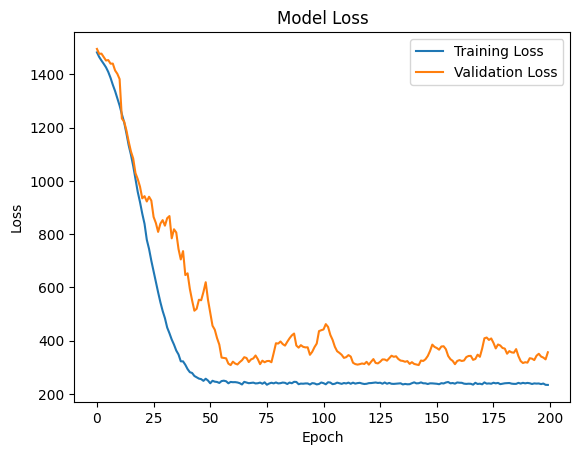

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot training & validation loss values
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Assuming `history` is the result of `model.fit()`
plot_training_history(history)


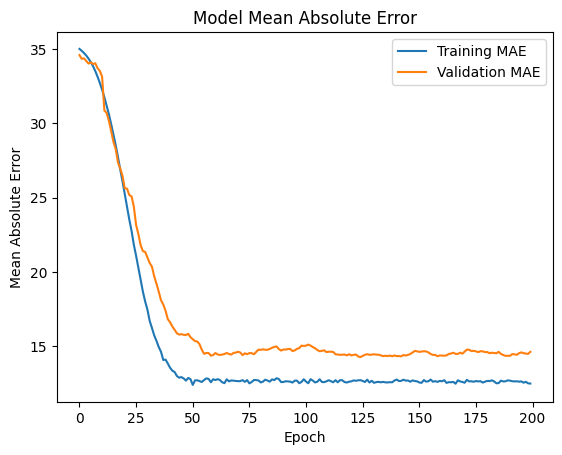

In [ ]:
def plot_mae_history(history):
    # Plot training & validation MAE values
    plt.plot(history.history['mean_absolute_error'], label='Training MAE')
    plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
    plt.title('Model Mean Absolute Error')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error')
    plt.legend()
    plt.show()

plot_mae_history(history)


The validation loss has stabilized and is fluctuating slightly, which means that the model has likely reached a plateau.
Increasing epochs probably won't lead to much further improvement, and you might just end up overfitting the model, especially if the validation loss starts increasing with more epochs.

Early stopping

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.callbacks import EarlyStopping

# Assuming you've already built your model
model = build_model(config)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),     # Adjust the optimizer and learning rate here if needed
    loss=MeanSquaredError(),                 # Specify the loss function (e.g., mean squared error)
    metrics=[MeanAbsoluteError()]            # Specify any metrics (e.g., mean absolute error)
)

# EarlyStopping callback to stop training when validation loss doesn't improve
early_stopping = EarlyStopping(
    monitor='val_loss',                     # Monitor the validation loss
    patience=10,                            # Stop after 10 epochs of no improvement
    restore_best_weights=True,              # Restore the best weights at the end
    verbose=1                               # Verbose mode to know when it's stopping
)

# Now fit the model
history = model.fit(
    X_train, y_train,
    epochs=200,                # You can set a large number of epochs
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],  # Early stopping will dynamically stop the model
    verbose=1,                   # Verbose mode to print progress
)

# Optionally, print the validation loss for each epoch for better tracking
val_losses = history.history['val_loss']
for epoch, val_loss in enumerate(val_losses):
    print(f"Epoch {epoch + 1}/{len(val_losses)} - Validation Loss: {val_loss}")


Epoch 1/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 1463.8115 - mean_absolute_error: 34.8074 - val_loss: 1727.5262 - val_mean_absolute_error: 37.8889
Epoch 2/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1435.5735 - mean_absolute_error: 34.5421 - val_loss: 1731.4518 - val_mean_absolute_error: 37.9761
Epoch 3/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1480.3560 - mean_absolute_error: 35.0058 - val_loss: 1751.2925 - val_mean_absolute_error: 38.2659
Epoch 4/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1466.6273 - mean_absolute_error: 34.7655 - val_loss: 1736.8925 - val_mean_absolute_error: 38.0871
Epoch 5/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1385.5284 - mean_absolute_error: 33.7261 - val_loss: 1742.2167 - val_mean_absolute_error: 38.1794
Epoch 6/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1333.9546 - mean_absolute_error: 33.1014 - val_loss: 1727.1675 - val_mean_absolute_error: 37.9874
Epoch 7/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss

In [ ]:
# Evaluate the model using the test data
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=2)

# Print the evaluation results
print(f"Test Loss: {test_loss}")
print(f"Test Mean Absolute Error: {test_mae}")


7/7 - 0s - 14ms/step - loss: 279.1639 - mean_absolute_error: 13.8541
Test Loss: 279.1639099121094
Test Mean Absolute Error: 13.854111671447754


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


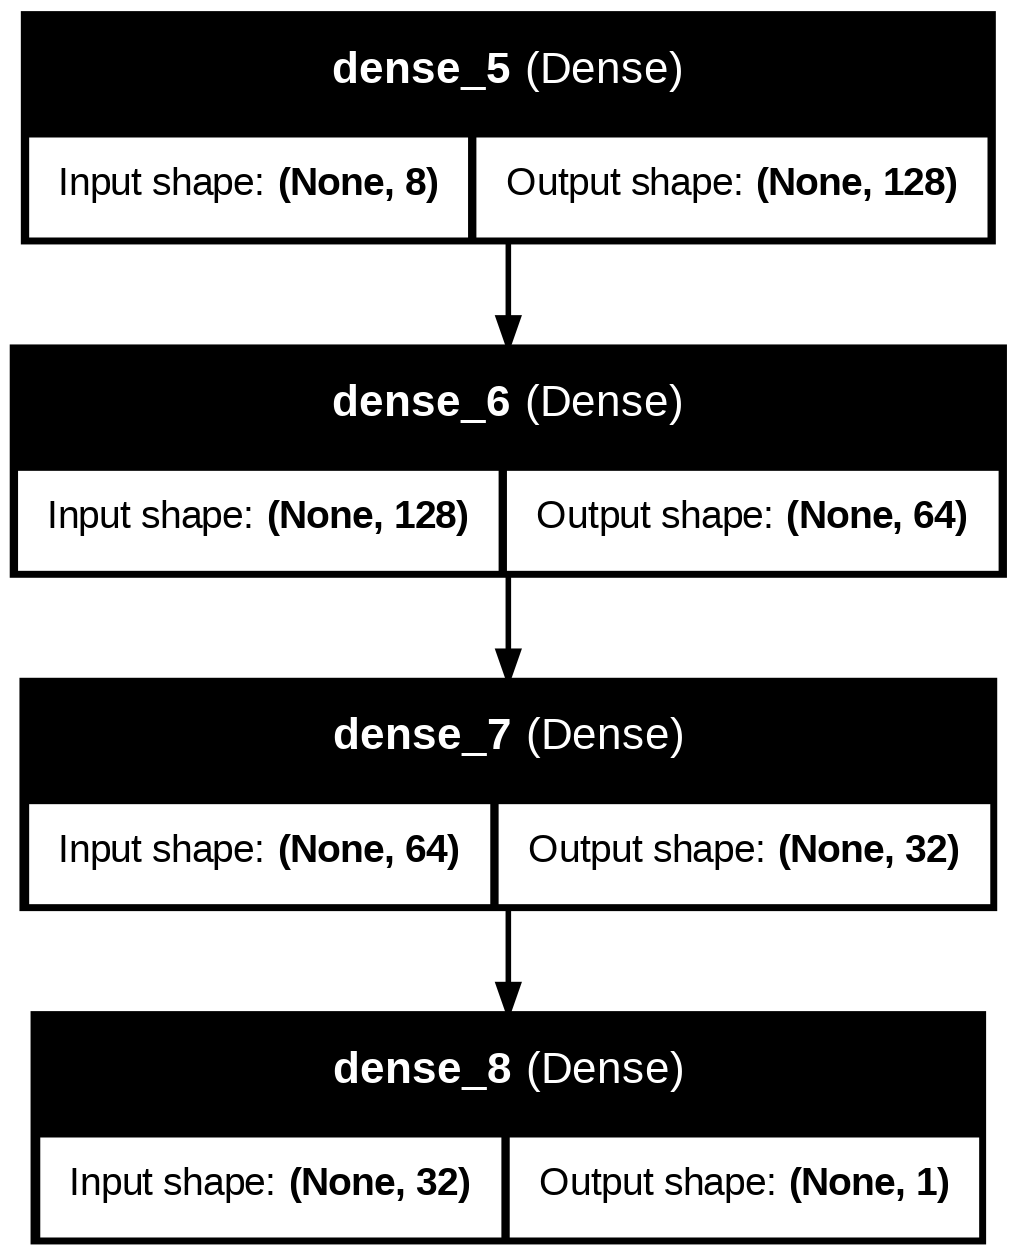

In [ ]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Example ANN model
model = Sequential()
model.add(Dense(units=128, activation='relu', input_shape=(8,)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='linear'))

# Generate a plot of the model architecture
plot_model(model, to_file='ann_model.png', show_shapes=True, show_layer_names=True)

# Display the image (if using Google Colab or Jupyter)
from IPython.display import Image
Image(filename='ann_model.png')


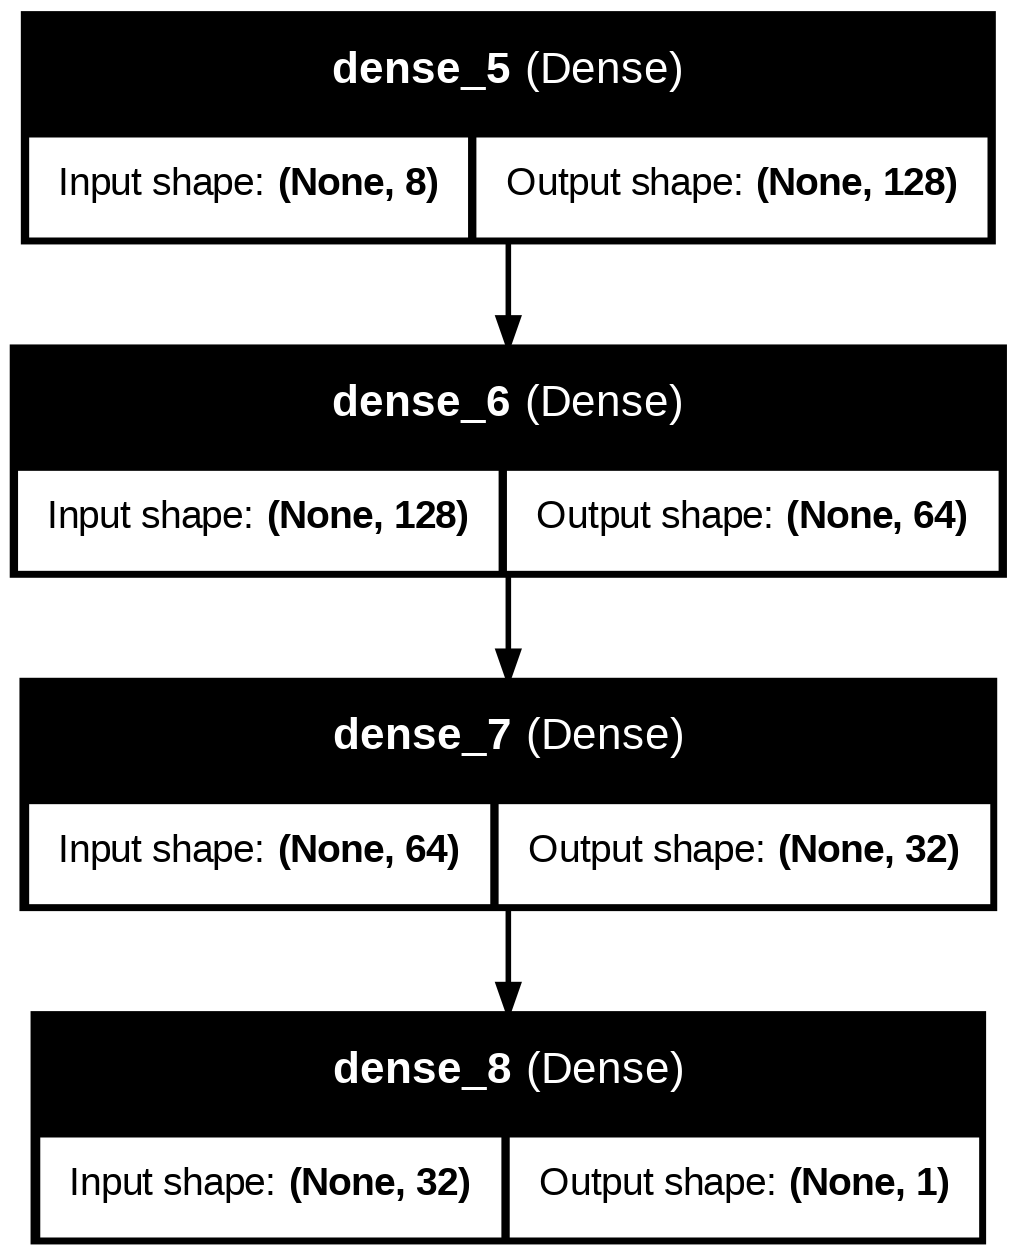

In [ ]:
# Plot the architecture with shapes and layer names
plot_model(model, to_file='ann_model.png', show_shapes=True, show_layer_names=True)

# Display the image (in Jupyter or Colab)
from IPython.display import Image
Image(filename='ann_model.png')


In [ ]:
pip install graphviz

In [ ]:
pip install graphviz pillow

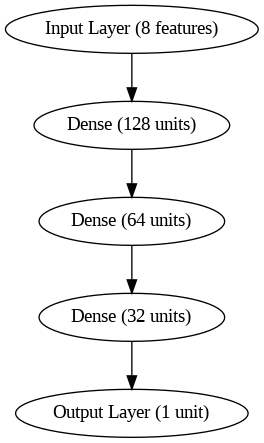

In [ ]:
from graphviz import Digraph
from IPython.display import Image
import PIL.Image

def create_ann_diagram():
    # Create a directed graph
    dot = Digraph()

    # Define input layer
    dot.node('Input', 'Input Layer (8 features)')

    # Define hidden layers
    dot.node('Hidden1', 'Dense (128 units)')
    dot.node('Hidden2', 'Dense (64 units)')
    dot.node('Hidden3', 'Dense (32 units)')

    # Define output layer
    dot.node('Output', 'Output Layer (1 unit)')

    # Connect layers using tuples
    dot.edges([('Input', 'Hidden1'), ('Hidden1', 'Hidden2'), ('Hidden2', 'Hidden3'), ('Hidden3', 'Output')])

    return dot

# Generate the ANN architecture diagram
ann_diagram = create_ann_diagram()

# Save the diagram to a file
ann_diagram.render('ann_diagram', format='png')

# Display the diagram using Pillow (PIL) or IPython.display
Image(filename='ann_diagram.png')


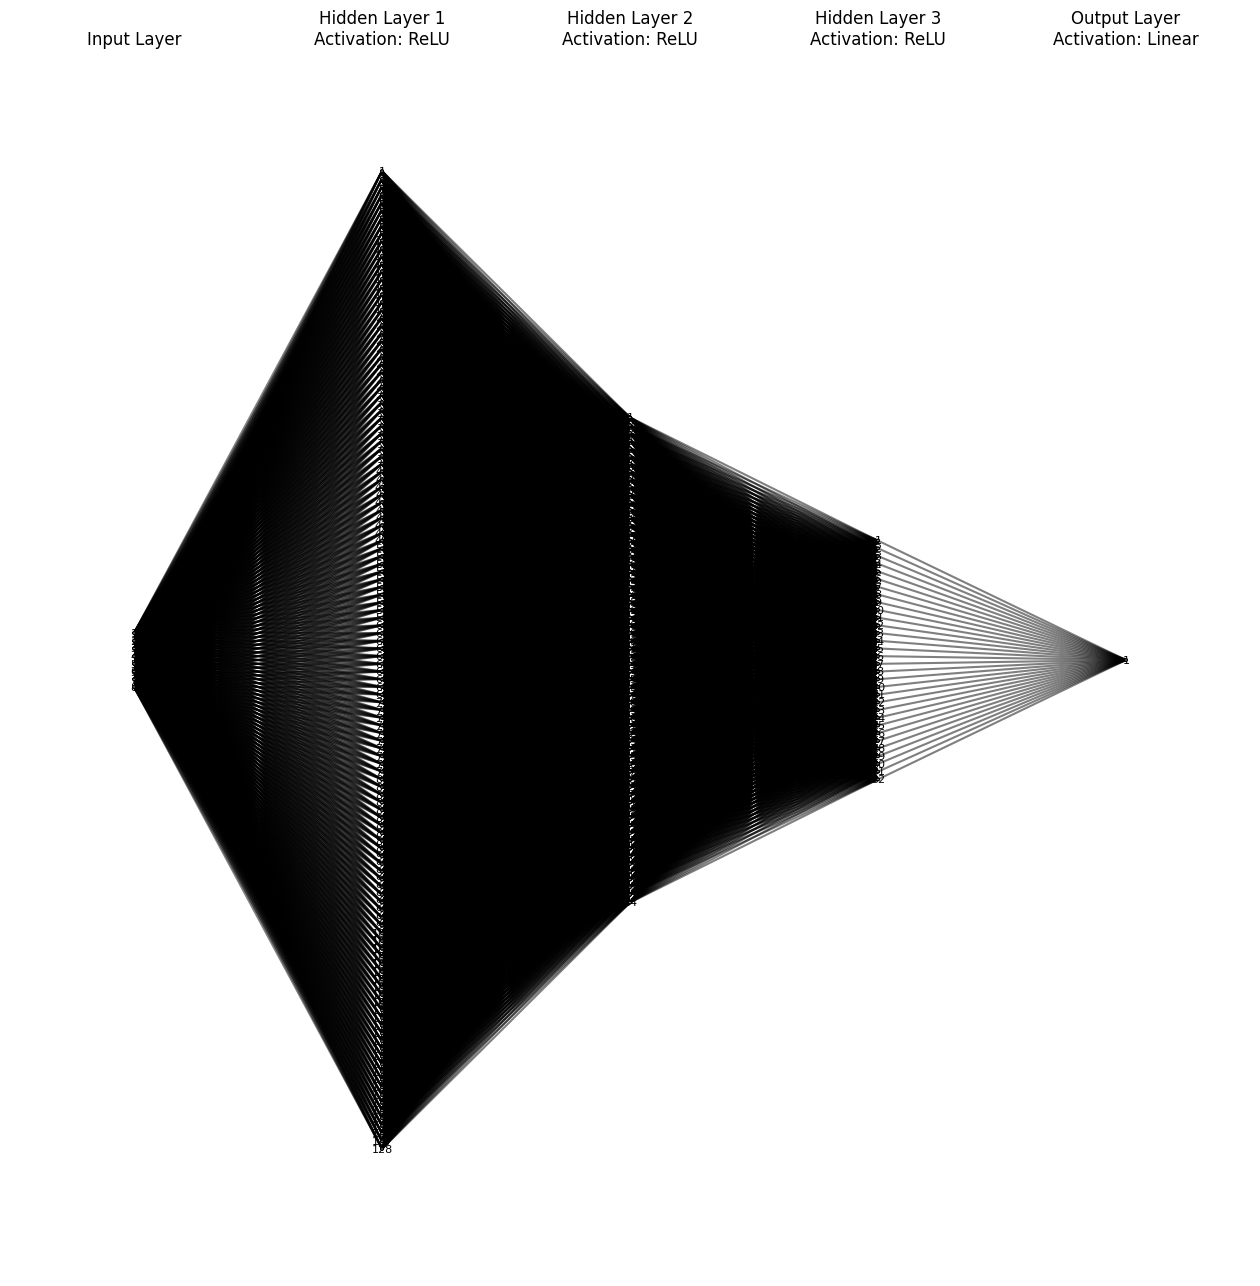

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''Draw a neural network cartoon using matplotilb.
       ax      : matplotlib.axes.AxesSubplot : The axes on which to plot the cartoon (get e.g. by plt.gca())
       left    : float : The center of the leftmost node(s) will be placed here
       right   : float : The center of the rightmost node(s) will be placed here
       bottom  : float : The center of the bottommost node(s) will be placed here
       top     : float : The center of the topmost node(s) will be placed here
       layer_sizes : list of int : List containing the number of nodes in each layer
    '''
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)

    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            ax.add_artist(plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/6.,
                                     color='w', ec='k', zorder=4))
            # Add node labels (neuron numbers)
            ax.text(n*h_spacing + left, layer_top - m*v_spacing, f'{m+1}', ha='center', va='center', fontsize=8)

    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing],
                                  c='k', alpha=0.5)  # Adjusted transparency for better readability
                ax.add_artist(line)

    # Add layer labels (layer types and activation functions)
    for i, layer_size in enumerate(layer_sizes):
        if i == 0:
            ax.text(i * h_spacing + left, top + 0.1, 'Input Layer', ha='center', fontsize=12)
        elif i == len(layer_sizes) - 1:
            ax.text(i * h_spacing + left, top + 0.1, 'Output Layer\nActivation: Linear', ha='center', fontsize=12)
        else:
            ax.text(i * h_spacing + left, top + 0.1, f'Hidden Layer {i}\nActivation: ReLU', ha='center', fontsize=12)

# Example to generate a labeled neural network
fig = plt.figure(figsize=(16, 16))  # Increased figure size for better clarity
ax = fig.gca()
ax.axis('off')

# Adjust layer sizes as needed
draw_neural_net(ax, .1, .9, .1, .9, [8, 128, 64, 32, 1])

plt.show()
